## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

In [0]:
import pandas as pd
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
import vis
from keras.models import Model

Using TensorFlow backend.


### Load Dataset Files

In [0]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/gdrive/My Drive/Colab Notebooks/Dog_Breed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

In [10]:
ls -l

total 26380
drwx------ 3 root root     4096 Jun  6 05:03 gdrive/
-rw-r--r-- 1 root root   482063 Jun  6 11:49 labels.csv
drwxr-xr-x 1 root root     4096 May 31 16:17 sample_data/
-rw-r--r-- 1 root root 25200295 Jun  6 11:49 sample_submission.csv
drwxr-xr-x 2 root root   638976 Jun  6 05:04 test/
drwxr-xr-x 2 root root   679936 Jun  6 05:03 train/


After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels_df = pd.read_csv('labels.csv')

### Print the count of each category of Dogs given in the dataset



In [12]:
labels_df.groupby(by='breed').count()

,id
breed,
affenpinscher,80
afghan_hound,116
african_hunting_dog,86
airedale,107
american_staffordshire_terrier,74
appenzeller,78
australian_terrier,102
basenji,110
basset,82


### Get one-hot encodings of labels

In [13]:
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
labels_en_df = pd.get_dummies(labels_df.breed)

In [15]:
labels_en_df.head(10)

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128

In [0]:
x_train = []
y_train = []

In [18]:
for f, img in tqdm(labels_df.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:23<00:00, 434.24it/s]


In [19]:
y_train[20]

'doberman'

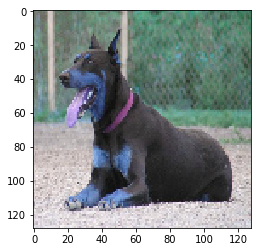

In [20]:
plt.imshow(x_train[20])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train_conv = np.array(x_train)

In [22]:
x_train_conv.shape

(10222, 128, 128, 3)

In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255

In [0]:
y_train_class = pd.get_dummies(y_train)

In [25]:
y_train_class.shape

(10222, 120)

### Split the training and validation data from `x_train_conv` and `y_train_class` obtained from above step

In [0]:
### Split the Dataset
X_train, X_val, y_train, y_val = train_test_split(x_train_conv, y_train_class, test_size=0.3, random_state=7)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img_df = pd.read_csv('sample_submission.csv',usecols=[0])

In [28]:
test_img_df.head()

,id
0,000621fb3cbb32d8935728e48679680e
1,00102ee9d8eb90812350685311fe5890
2,0012a730dfa437f5f3613fb75efcd4ce
3,001510bc8570bbeee98c8d80c8a95ec1
4,001a5f3114548acdefa3d4da05474c2e


Run the below code to load the test image files in x_test_feature

In [29]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img_df.id): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:25<00:00, 403.00it/s]


Normalize the test data and convert it into 4 dimensions

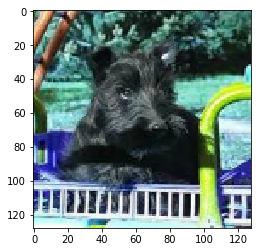

In [30]:
plt.imshow(x_test_feature[20])

In [0]:
x_test_conv = np.array(x_test_feature)

In [32]:
x_test_conv.shape

(10357, 128, 128, 3)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [33]:
model_conv = Sequential()
model_conv.add(Conv2D(32, (5, 3), activation='relu', input_shape=(128, 128, 3)))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
model_conv.add(Conv2D(32, (3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model_conv.add(Flatten())
model_conv.add(Dense(256, activation='relu'))
model_conv.add(Dense(120, activation='softmax'))

In [35]:
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 126, 32)      1472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1384704   
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total para

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
model_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [37]:
%%time 
output_conv = model_conv.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2,
                    validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7155 samples, validate on 3067 samples
Epoch 1/10
 - 6s - loss: 4.7903 - acc: 0.0098 - val_loss: 4.7921 - val_acc: 0.0082
Epoch 2/10
 - 3s - loss: 4.7845 - acc: 0.0092 - val_loss: 4.7897 - val_acc: 0.0075
Epoch 3/10
 - 3s - loss: 4.7811 - acc: 0.0091 - val_loss: 4.7888 - val_acc: 0.0075
Epoch 4/10
 - 3s - loss: 4.7784 - acc: 0.0120 - val_loss: 4.7877 - val_acc: 0.0108
Epoch 5/10
 - 3s - loss: 4.7753 - acc: 0.0130 - val_loss: 4.7870 - val_acc: 0.0104
Epoch 6/10
 - 3s - loss: 4.7723 - acc: 0.0150 - val_loss: 4.7856 - val_acc: 0.0111
Epoch 7/10
 - 3s - loss: 4.7683 - acc: 0.0164 - val_loss: 4.7833 - val_acc: 0.0114
Epoch 8/10
 - 3s - loss: 4.7636 - acc: 0.0171 - val_loss: 4.7801 - val_acc: 0.0114
Epoch 9/10
 - 3s - loss: 4.7574 - acc: 0.0177 - val_loss: 4.7769 - val_acc: 0.0121
Epoch 10/10
 - 3s - loss: 4.7496 - acc: 0.0203 - val_loss: 4.7710 - val_acc: 0.0143
CPU times: user 21.3 s, sys: 5.92 s, total: 27.2 s
Wall time: 32.7 s


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [0]:
data = ImageDataGenerator(validation_split=0.2, 
                          rescale=1/255,
                          samplewise_center=True, # set input mean to 0 over the sample
                          samplewise_std_normalization=True,  # divide inputs by std of the sample
                          rotation_range=90,       # randomly rotate images in the range (degrees, 0 to 180)
                          width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
                          height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                          fill_mode='reflect',     # filling the area outside
                          zoom_range=0.4,          # random zoom
                          horizontal_flip=True,    # randomly flip images
                          vertical_flip=True)      # randomly flip images

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = data.flow(X_train, y_train, batch_size=128)

In [0]:
val_generator = data.flow(X_val,y_val,batch_size = 128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [42]:
output_imggen = model_conv.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 2, steps_per_epoch=20, validation_steps=80)

Epoch 1/10
 - 41s - loss: 4.7951 - acc: 0.0137 - val_loss: 4.8004 - val_acc: 0.0128
Epoch 2/10
 - 36s - loss: 4.7739 - acc: 0.0176 - val_loss: 4.7869 - val_acc: 0.0115
Epoch 3/10
 - 37s - loss: 4.7695 - acc: 0.0129 - val_loss: 4.7815 - val_acc: 0.0137
Epoch 4/10
 - 37s - loss: 4.7542 - acc: 0.0152 - val_loss: 4.7758 - val_acc: 0.0128
Epoch 5/10
 - 37s - loss: 4.7588 - acc: 0.0141 - val_loss: 4.7718 - val_acc: 0.0120
Epoch 6/10
 - 38s - loss: 4.7542 - acc: 0.0109 - val_loss: 4.7691 - val_acc: 0.0145
Epoch 7/10
 - 37s - loss: 4.7401 - acc: 0.0187 - val_loss: 4.7688 - val_acc: 0.0151
Epoch 8/10
 - 37s - loss: 4.7419 - acc: 0.0156 - val_loss: 4.7629 - val_acc: 0.0139
Epoch 9/10
 - 37s - loss: 4.7349 - acc: 0.0189 - val_loss: 4.7569 - val_acc: 0.0161
Epoch 10/10
 - 37s - loss: 4.7300 - acc: 0.0211 - val_loss: 4.7508 - val_acc: 0.0149


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('./gdrive/My Drive/Colab Notebooks/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [44]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [45]:
x = base_model.output
#x = Flatten()(x)
x = Dense(1024, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
predictions = Dense(120, activation='softmax')(x)

# this is the model we will train
m = Model(inputs=base_model.input, outputs=predictions)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in m.layers:
    m.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
m.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [48]:
m_output =  m.fit_generator(train_generator, epochs=10, steps_per_epoch=1000 // 8,
                            validation_data=val_generator, validation_steps=128,
                            verbose = 1)

Epoch 1/10
125/125 [==============================] - 126s 1s/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0485 - val_acc: 0.9917
Epoch 2/10
125/125 [==============================] - 115s 919ms/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0485 - val_acc: 0.9917
Epoch 3/10
125/125 [==============================] - 118s 943ms/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0486 - val_acc: 0.9917
Epoch 4/10
125/125 [==============================] - 118s 942ms/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0485 - val_acc: 0.9917
Epoch 5/10
125/125 [==============================] - 119s 949ms/step - loss: 0.0488 - acc: 0.9917 - val_loss: 0.0486 - val_acc: 0.9917
Epoch 6/10
125/125 [==============================] - 117s 939ms/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0486 - val_acc: 0.9917
Epoch 7/10
125/125 [==============================] - 116s 931ms/step - loss: 0.0489 - acc: 0.9917 - val_loss: 0.0485 - val_acc: 0.9917
Epoch 8/10
125/125 [==============================]